# Figure 7: Ingest-Times for different Jetstream2 Instance Types

Total time taken to ingest 1.6 billion entries on different instance types using Clickhouse and Jetstream2
We include our measurements and the code to generate the figures.

### Prerequisites

To recreate the figure only the dependencies along with the datasets in "../data/figure5" are required.

Ensure the following imports work:

In [24]:
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pylab as plt

Specify data path (default is measurements series used in the paper):

In [25]:
DATA_DIR = "../data/figure6" # Figure 6 and Figure 7 share the same raw data source

## Loading and Preparing the Data

In [26]:
lst = glob.glob(f"{DATA_DIR}/*/*.csv")
lst

['../data/figure6/2022-08-24T00:45:32.655277_m3.medium_gladly-united-swift/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T00:49:38.286420_m3.quad_blatantly-intense-bison/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T07:56:56.839123_m3.large_generally-dashing-mollusk/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T08:52:30.274943_m3.xl_roughly-renewed-buzzard/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T10:02:04.207596_m3.2xl_simply-talented-pangolin/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T15:05:10.206125_m3.tiny_jointly-cute-heron/measurements_cmdline_ingest.csv',
 '../data/figure6/2022-08-31T17:13:24.111538_m3.small_heavily-new-piglet/measurements_cmdline_ingest.csv']

In [27]:
def get_info_from_filename(filename):
    info =  filename.split("/")[-2].split("_")
    print(info)
    return info


totals = []

dfs = []

for filename in lst:
    df = pd.read_csv(filename)
    
    filename_info = get_info_from_filename(filename)
    
    df.columns = ["Filename", "Filesize", "Entries", "Start", "End"]

    df["Start"] = pd.to_datetime(df["Start"])
    df["End"] = pd.to_datetime(df["End"])

    df["Elapsed (s)"] = (df["End"] - df["Start"]).apply(lambda x: x.total_seconds())

    df["Entries/s"] = df["Entries"] / df["Elapsed (s)"]

    df["Index Size"] = df["Entries"].cumsum()
    dfs.append(df)
    
    
    
    totals_entry = {
        "Start": df["Start"].min(),
        "End": df["Start"].max(),
        "Instance Type": filename_info[1],
        "Experiment": "_".join(filename_info)
    } 
    totals_entry["Elapsed"] =  (totals_entry["End"] - totals_entry["Start"]).total_seconds() 
    
    totals.append(totals_entry)

['2022-08-24T00:45:32.655277', 'm3.medium', 'gladly-united-swift']
['2022-08-31T00:49:38.286420', 'm3.quad', 'blatantly-intense-bison']
['2022-08-31T07:56:56.839123', 'm3.large', 'generally-dashing-mollusk']
['2022-08-31T08:52:30.274943', 'm3.xl', 'roughly-renewed-buzzard']
['2022-08-31T10:02:04.207596', 'm3.2xl', 'simply-talented-pangolin']
['2022-08-31T15:05:10.206125', 'm3.tiny', 'jointly-cute-heron']
['2022-08-31T17:13:24.111538', 'm3.small', 'heavily-new-piglet']


In [28]:
total_df = pd.DataFrame(totals)

total_df = total_df.set_index("Instance Type")

total_df = total_df.reindex([
    'm3.tiny',
    'm3.small',
    'm3.quad',
    'm3.medium',
    'm3.large', 
    'm3.xl', 
    'm3.2xl', 
])
total_df = total_df.reset_index()
total_df

,Instance Type,Start,End,Experiment,Elapsed
0,m3.tiny,2022-10-27 15:05:22.286806,2022-10-27 16:36:26.838775,2022-08-31T15:05:10.206125_m3.tiny_jointly-cut...,5464.551969
1,m3.small,2022-10-27 17:13:37.745847,2022-10-27 18:08:51.700834,2022-08-31T17:13:24.111538_m3.small_heavily-ne...,3313.954987
2,m3.quad,2022-10-27 00:51:08.130768,2022-10-27 01:26:37.189017,2022-08-31T00:49:38.286420_m3.quad_blatantly-i...,2129.058249
3,m3.medium,2022-10-27 00:45:26.262000,2022-10-27 01:18:09.532648,2022-08-24T00:45:32.655277_m3.medium_gladly-un...,1963.270648
4,m3.large,2022-10-27 07:57:13.326449,2022-10-27 08:28:43.739828,2022-08-31T07:56:56.839123_m3.large_generally-...,1890.413379
5,m3.xl,2022-10-27 08:53:32.780535,2022-10-27 09:24:51.791268,2022-08-31T08:52:30.274943_m3.xl_roughly-renew...,1879.010733
6,m3.2xl,2022-10-27 10:04:47.908450,2022-10-27 10:35:57.596162,2022-08-31T10:02:04.207596_m3.2xl_simply-talen...,1869.687712


## Generating the Figure

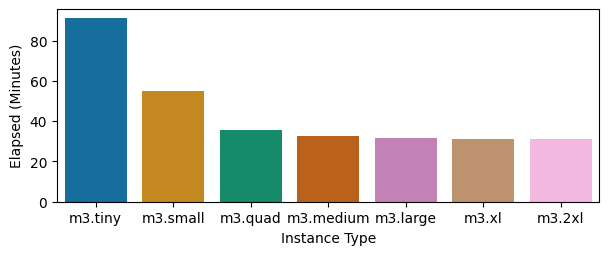

In [29]:
import seaborn as sns
import humanize
from matplotlib import rcParams
import matplotlib.pylab as plt

rcParams['figure.figsize'] = (7, 2.5)
sns.set_palette("colorblind")

tmp_df = total_df.copy()
tmp_df = tmp_df.reset_index()

tmp_df["Elapsed (Minutes)"] = tmp_df["Elapsed"] / 60
ax = sns.barplot(data=tmp_df, x="Instance Type", y="Elapsed (Minutes)")


plt.show()